# Objective : Diabetes Dataset Regression
# EDA - Python
# Insights - Patterns
#  Regression

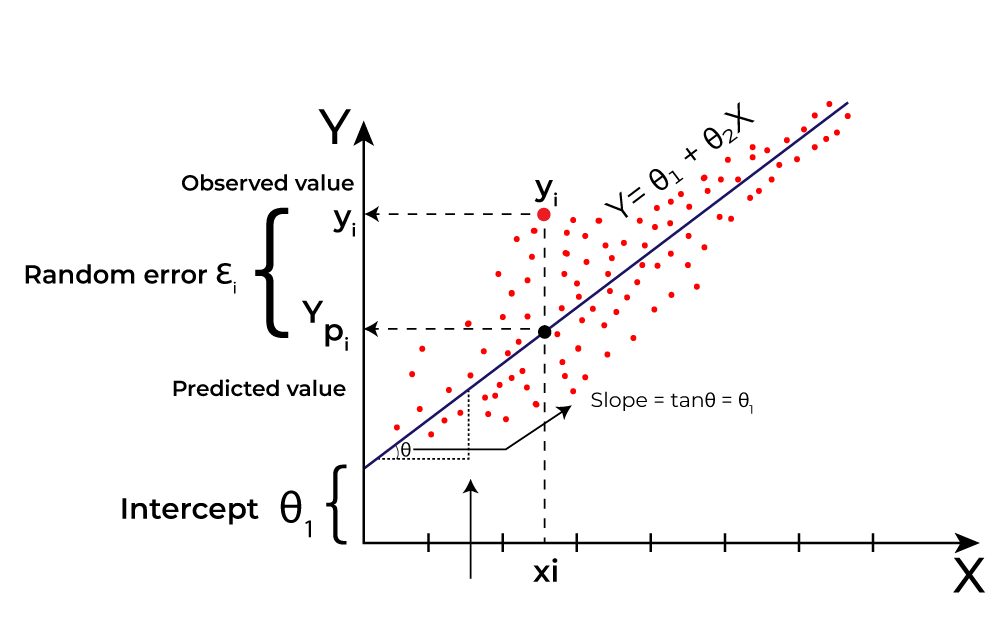

# 1. Import Python Modules

In [106]:
# Load necessary python modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,Lasso, Ridge,ElasticNet

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

from sklearn.metrics import mean_squared_error,root_mean_squared_error

from sklearn.metrics import r2_score

# 2.  Load Dataset

- dataset taken - https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset

In [107]:
file_path = r"diabetes_dataset.csv"
diabetes_df = pd.read_csv(file_path)
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


$observations$
- Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum 
- measurements were obtained for each of n = 442 diabetes patients, 
- as well as the response of interest, a quantitative measure of disease progression one year after baseline.

- age

- sex

- bmi body mass index

- bp average blood pressure

- s1 tc, total serum cholesterol

- s2 ldl, low-density lipoproteins

- s3 hdl, high-density lipoproteins

- s4 tch, total cholesterol / HDL

- s5 ltg, possibly log of serum triglycerides level

- s6 glu, blood sugar level

### Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times the square root of n_samples

# 3. Basic Inspection on dataset

In [108]:
def basic_inspection_dataset(table):
    """Generates a basic inspection dataset from the given table."""
    
    print("top 5 rows - using head")
    print(table.head())
    print()
        
    print("bottom 5 rows using tail")
    print(table.tail())
    print()
        
    print("numbers of samples and columns")
    print(table.shape)
    print()
    
    print("numbers of samples ")
    print(len(table))
    print()
    
    print("numbers of entries in the data frame")
    print(table.size)
    print()
    
    print("Columns Names")
    print(table.columns)
    print()

    print("Columns dtypes")
    print(table.dtypes)
    print()
    
    print("Dataframe info")
    print(table.info())
    print()
    
    print()
    print("check the missing value in each column")
    print(table.isnull().sum())
          
    print()
    print("check the missing value in each column")
    print(table.isna().sum())
    
    print()
    print("table summary ")
    print(table.describe())

basic_inspection_dataset(diabetes_df)

top 5 rows - using head
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  

bottom 5 rows using tail
          age       sex       bmi        bp        s1        s2        s3  \
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0

In [109]:
diabetes_df["sex"].value_counts()

sex
-0.044642    235
 0.050680    207
Name: count, dtype: int64

In [110]:
diabetes_df['sex']=diabetes_df['sex'].apply(lambda x: 'Female' if x < 0.05 else 'Male')
diabetes_df['sex'].astype('category')

0        Male
1      Female
2        Male
3      Female
4      Female
        ...  
437      Male
438      Male
439      Male
440    Female
441    Female
Name: sex, Length: 442, dtype: category
Categories (2, object): ['Female', 'Male']

In [111]:
diabetes_df["target_log"]=np.log1p(diabetes_df["target"])
diabetes_df["target_sqrt"]=np.sqrt(diabetes_df["target"])

# 4. Handling Missing Values - Cat

In [112]:
# There is no missing values in cat columns

# 5. Categorical- Variable - Analysis -Using Pipeline

In [113]:
class BarPieChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        cat_cols = df.select_dtypes(include='object').columns
        for cat_name in cat_cols:
            value_counts = df[cat_name].value_counts().reset_index()
            # Rename the columns
            value_counts.columns = ['Class', 'Frequency']

            # Print the result as a table
            print(f"{cat_name} frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Calculate relative frequency
            total_count = value_counts['Frequency'].sum()
            value_counts['Relative Frequency %'] = round((value_counts['Frequency'] / total_count)*100,2)

            # Print the result as a table
            print(f"{cat_name} Relative frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Extract the values and index from value counts
            value_counts = df[cat_name].value_counts()
            values = value_counts.values
            labels = value_counts.index

            fig, axs = plt.subplots(1, 2, figsize=(18, 6))  # 1 row, 2 columns
            # Create a bar graph
            axs[0].bar(labels, values)
            axs[0].set_title(f'Frequency of {cat_name}')
            axs[0].set_xlabel('Categories')  # Set x-label
            axs[0].set_ylabel('Count')       # Set y-label

            axs[1].pie(value_counts.values, labels=value_counts.index, autopct='%0.2f%%', startangle=40)
            axs[1].set_title(f'Relative Frequency of {cat_name}')
            plt.tight_layout()
            # Show the plot
            plt.show()  
        
        

sex frequency table
+---+--------+-----------+
|   | Class  | Frequency |
+---+--------+-----------+
| 0 | Female |    235    |
| 1 |  Male  |    207    |
+---+--------+-----------+
sex Relative frequency table
+---+--------+-----------+----------------------+
|   | Class  | Frequency | Relative Frequency % |
+---+--------+-----------+----------------------+
| 0 | Female |    235    |        53.17         |
| 1 |  Male  |    207    |        46.83         |
+---+--------+-----------+----------------------+


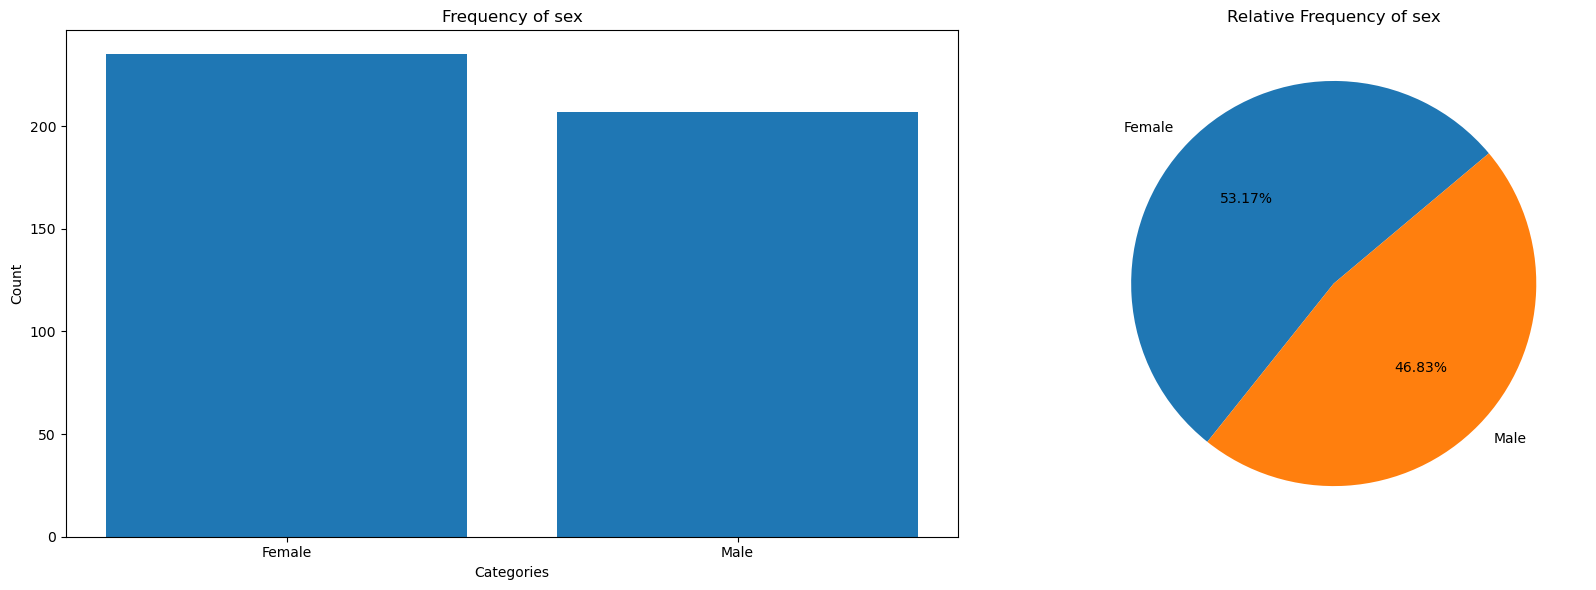

In [114]:
pipeline_cat_var = Pipeline([
    ('bar_pie_chart', BarPieChartTransformer())
])

# Fit and transform your data using the pipeline
processed_data = pipeline_cat_var.fit_transform(diabetes_df)

# 6. Handling Missing Values in Numerical Columns

In [115]:
# There is no missing values in num columns

# 7. Numerical - Variables - Analysis - Using -Pipeline

In [116]:
class HistBoxChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        num_cols = df.select_dtypes(exclude='object').columns
        for con_var in num_cols:
               
            
            # Create a figure and axes object
            fig, axes = plt.subplots(1, 2, figsize=(14, 6))

            # Plot histogram without KDE on the left
            axes[0].hist(df[con_var], color='skyblue', edgecolor='black')
            axes[0].set_xlabel('Value')
            axes[0].set_ylabel('Frequency')
            axes[0].set_title(f'Histogram {con_var}')

            # Plot histogram with KDE on the right
            sns.histplot(data=df, x=con_var, kde=True, color='orange', edgecolor='black', ax=axes[1])
            axes[1].set_xlabel('Value')
            axes[1].set_ylabel('Density')
            axes[1].set_title('Histogram with KDE')

            # Adjust layout
            plt.tight_layout()

            # Show the combined plot
            plt.show()
        


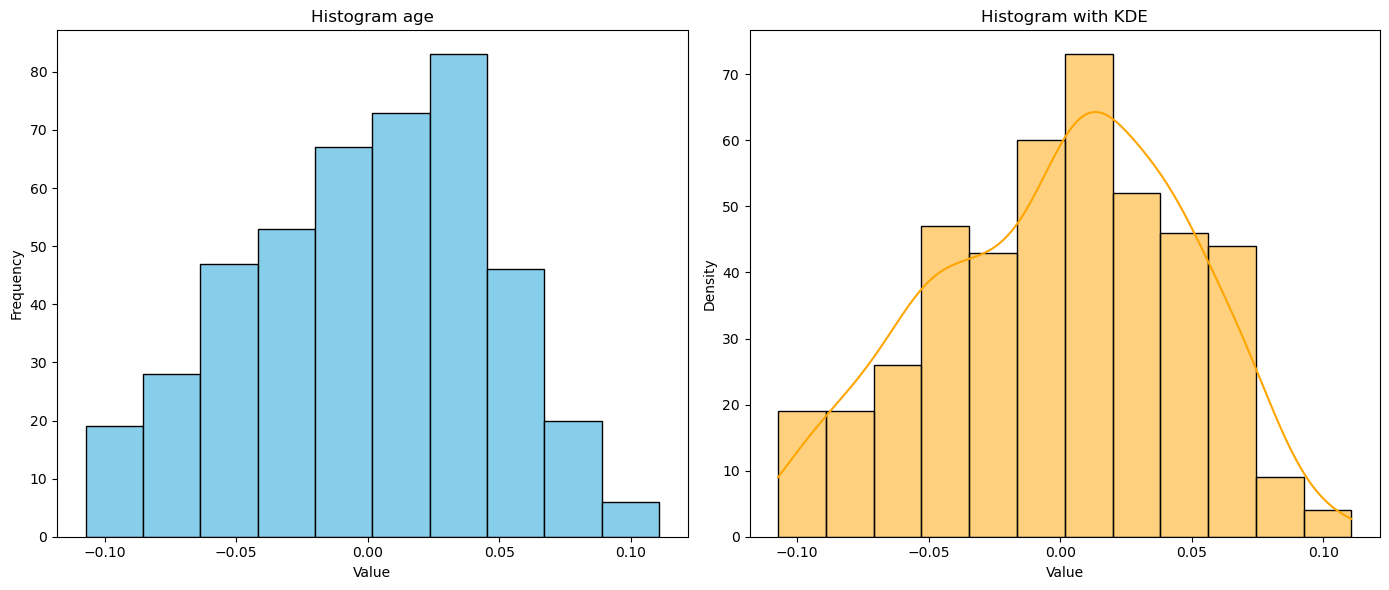

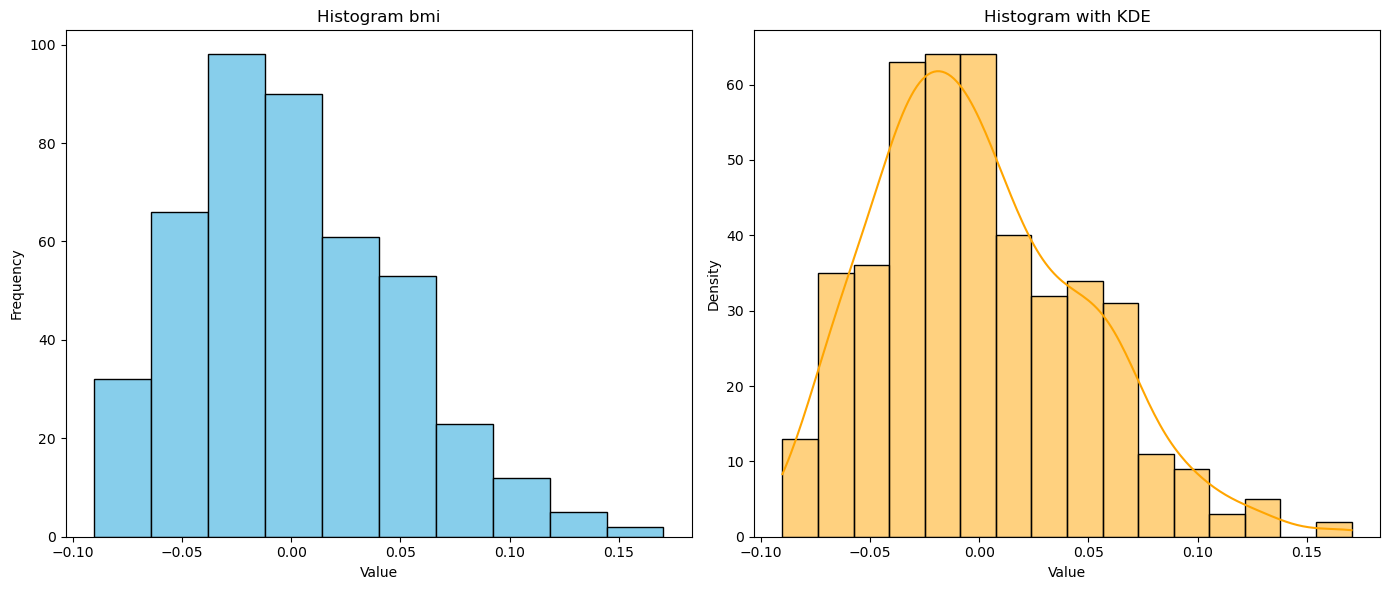

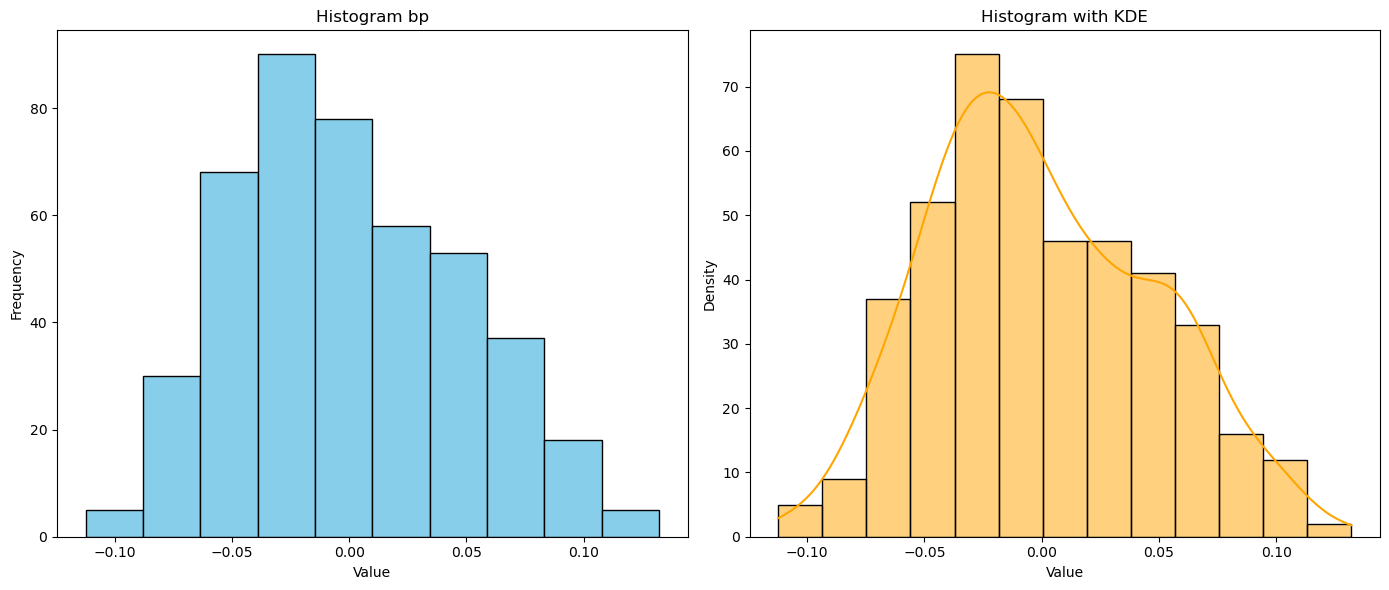

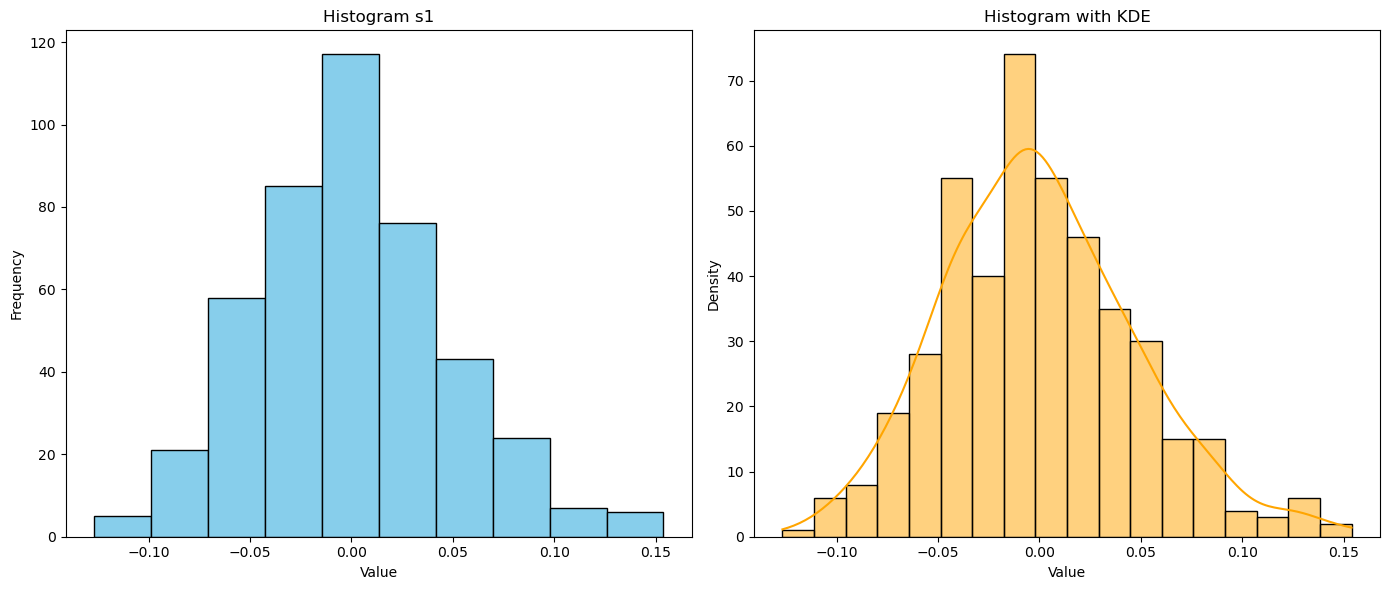

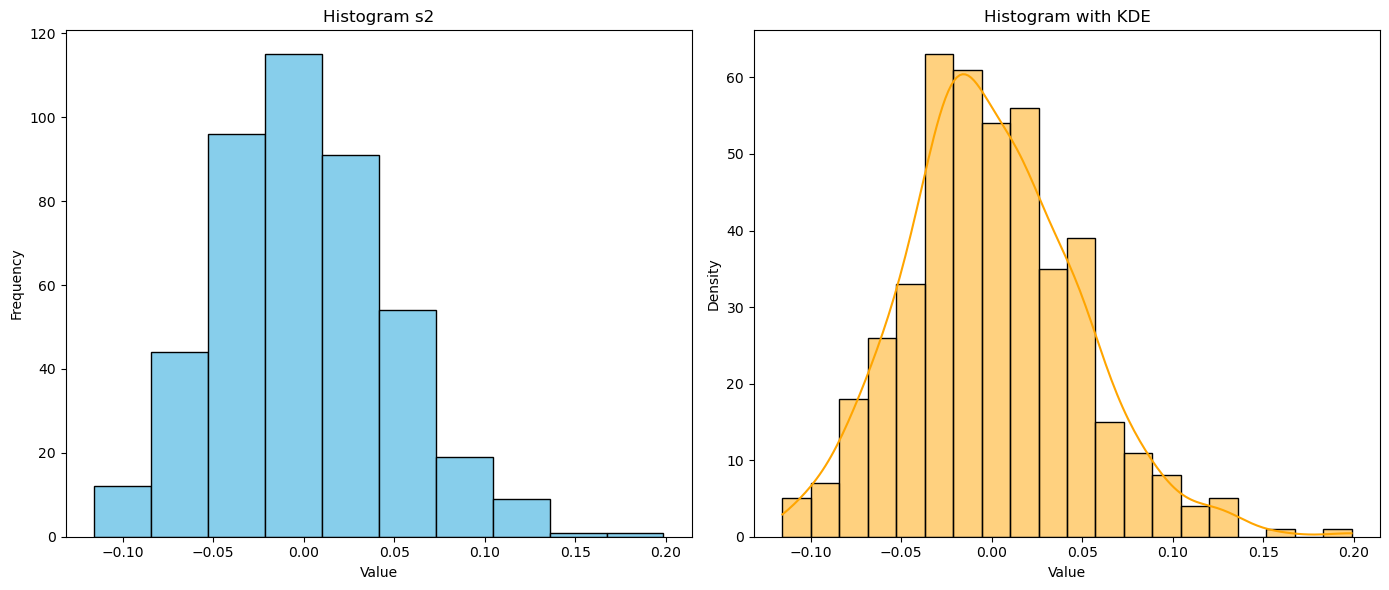

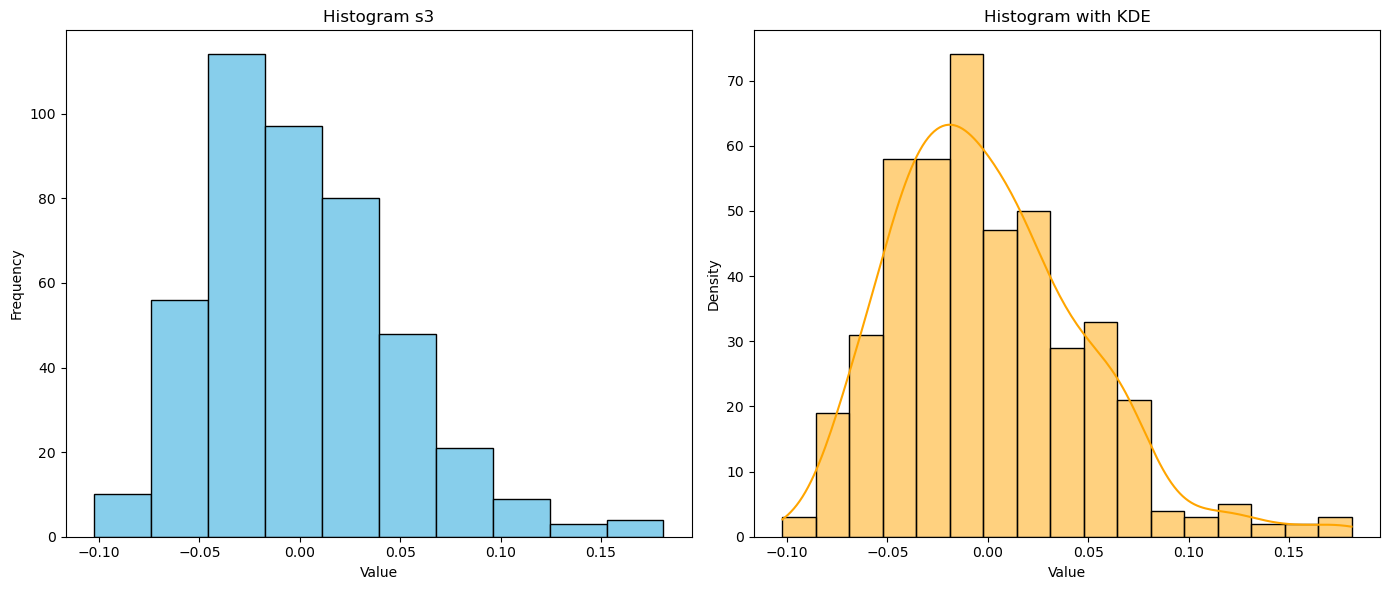

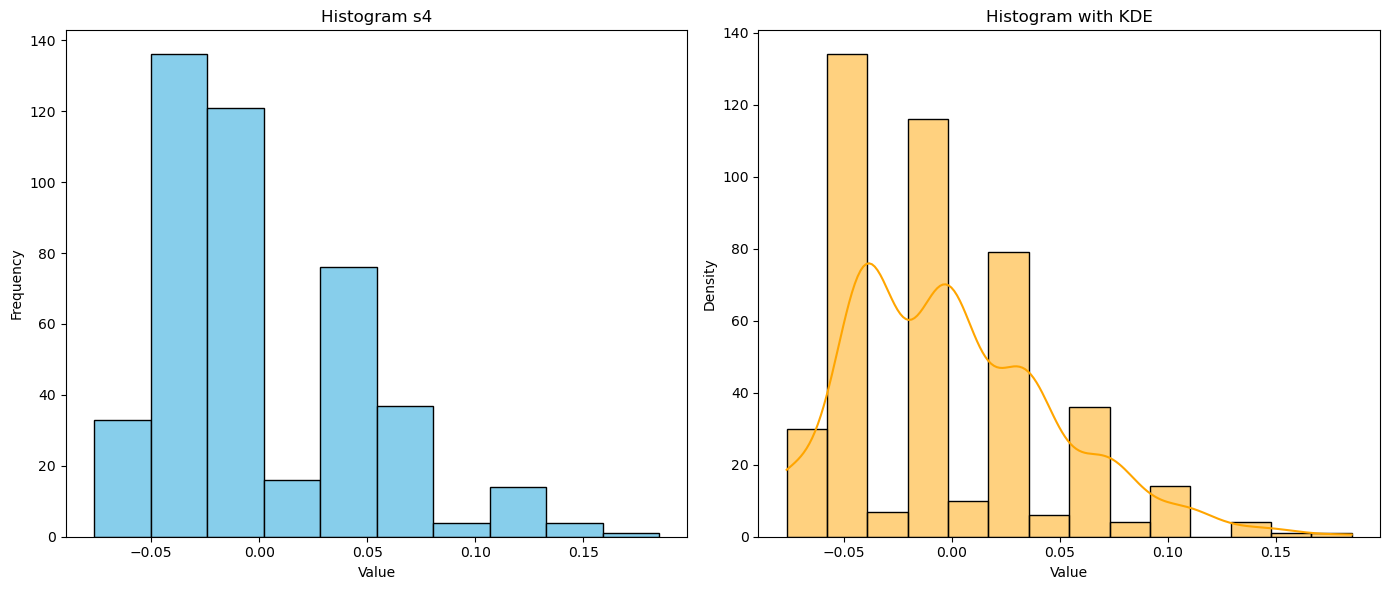

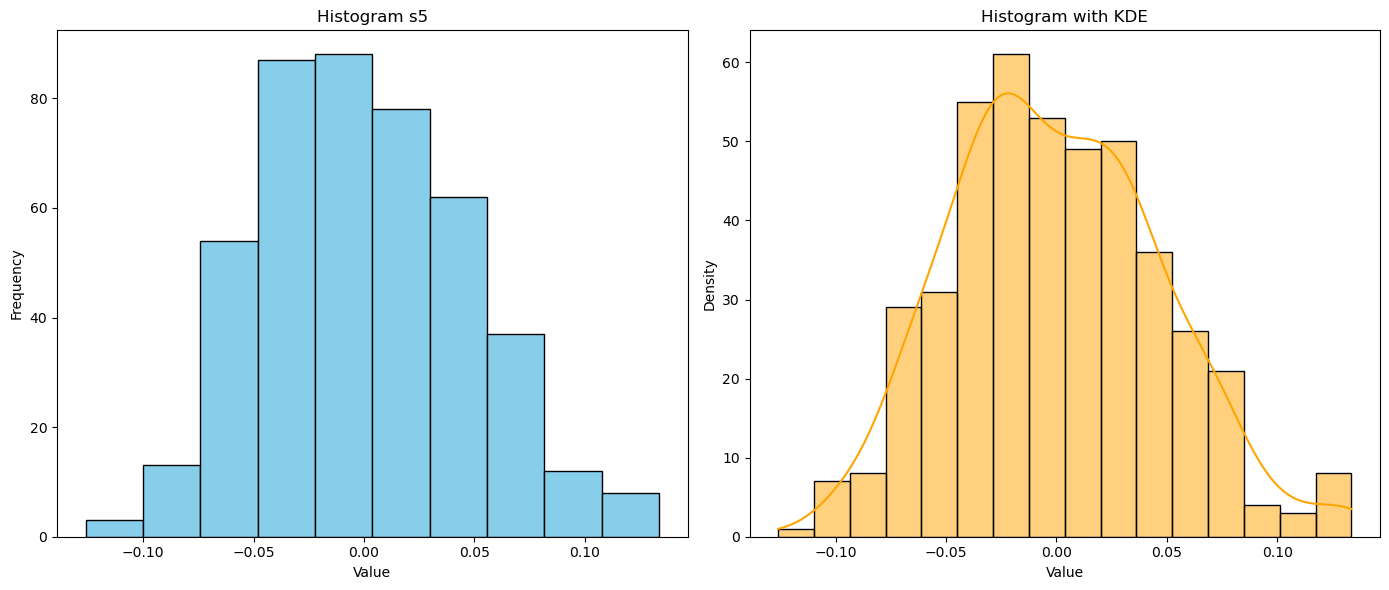

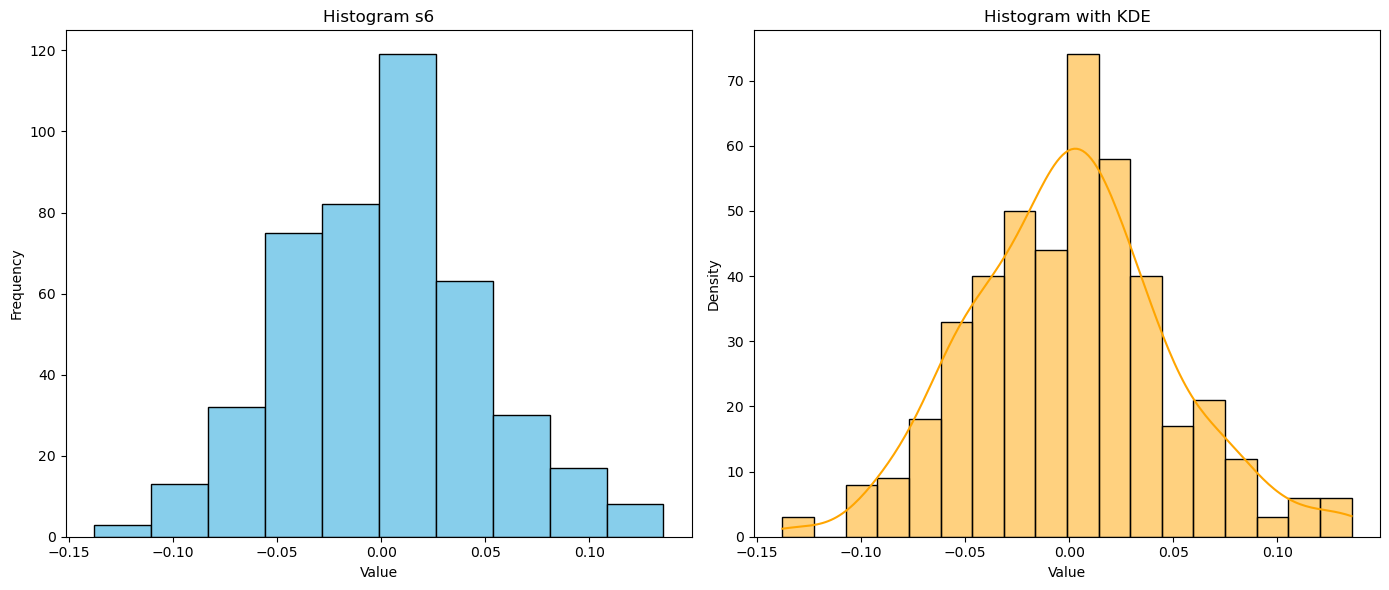

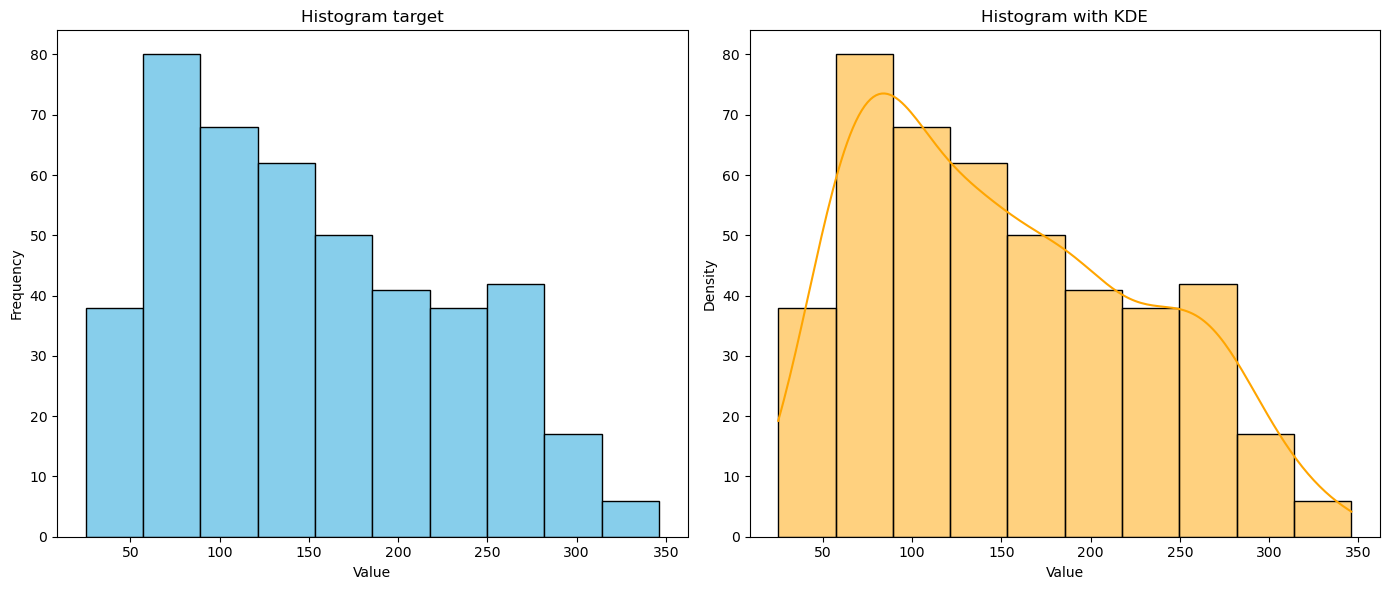

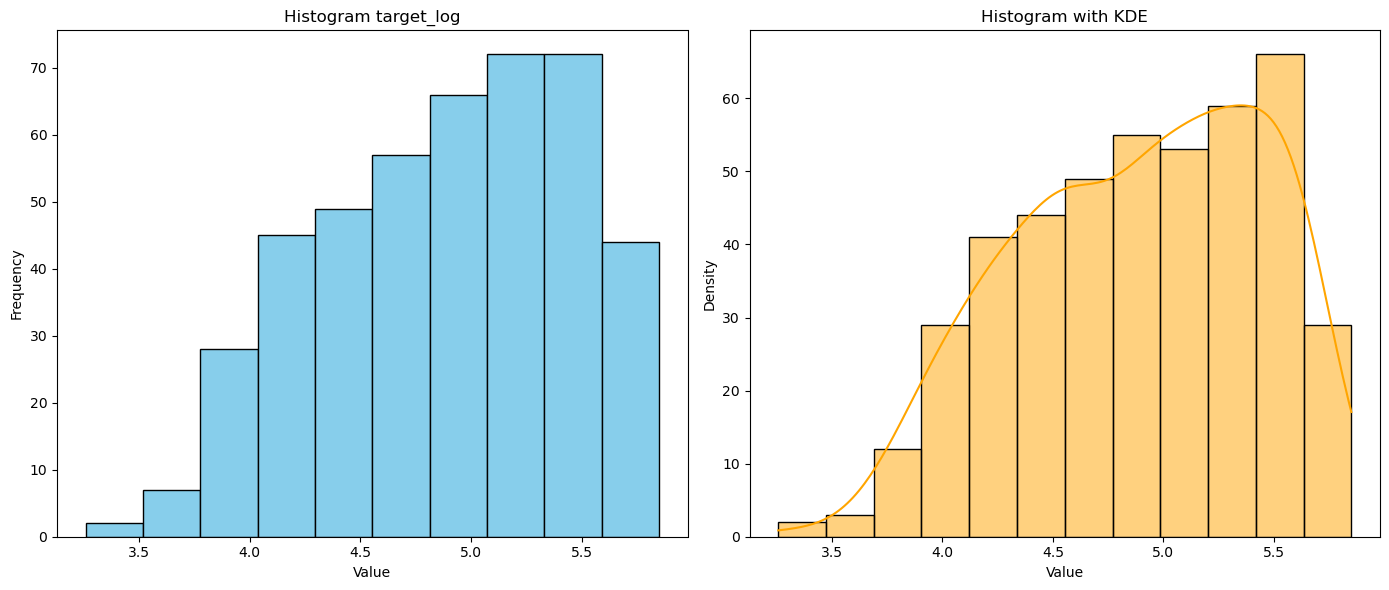

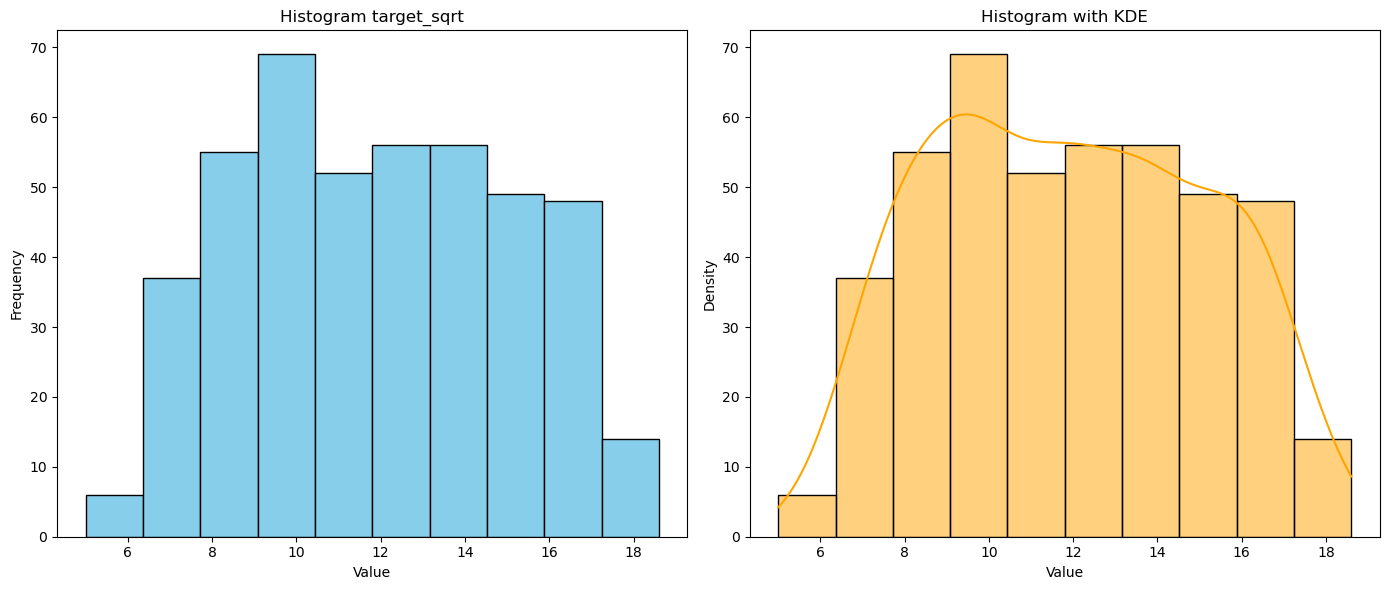

In [117]:
pipeline_num_var = Pipeline([
    ('hist_box_chart', HistBoxChartTransformer())
])

# Fit and transform your data using the pipeline
processed_data = pipeline_num_var.fit_transform(diabetes_df)

 # 8. Numerical - Variables -Outliers Analysis

# 9. Bi Variate Analysis

## Cat Vs Num

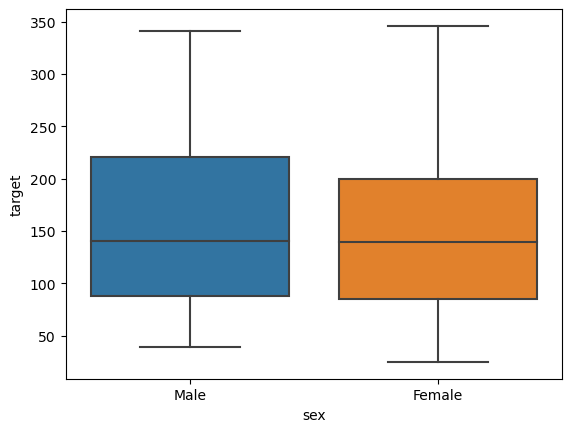

In [118]:
# Create a box plot with hue
sns.boxplot(x='sex' ,y='target', data=diabetes_df)
# Show the plot
plt.show()

## Num Vs Num

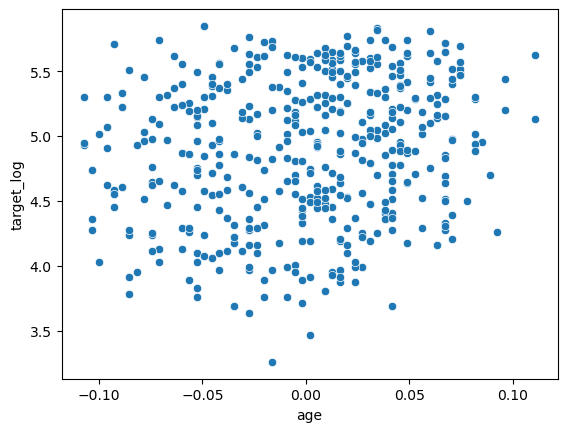

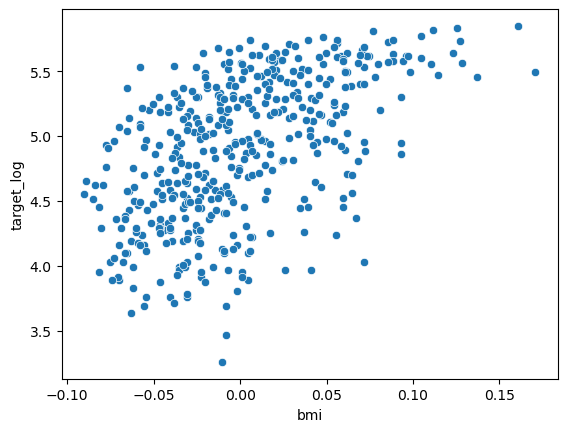

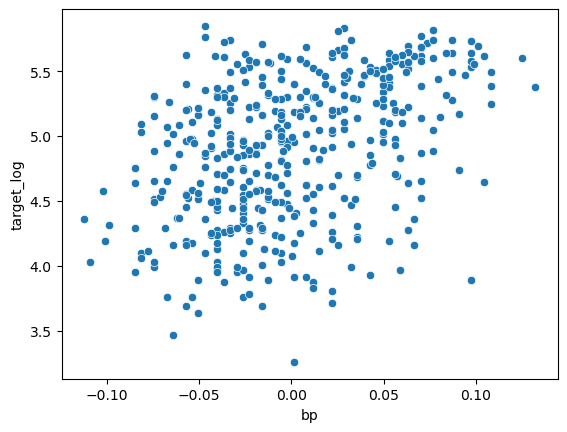

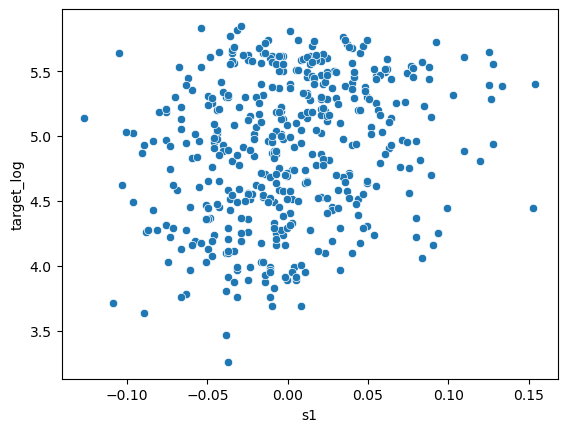

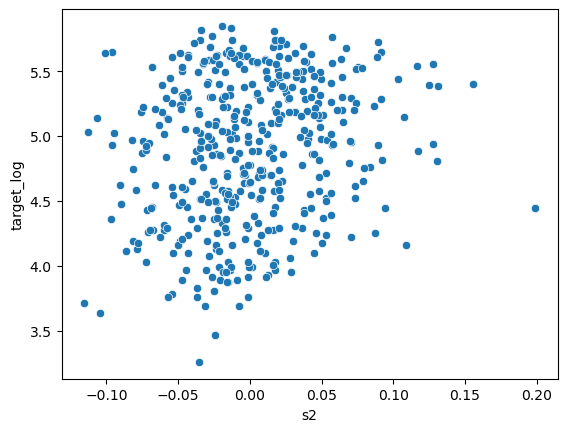

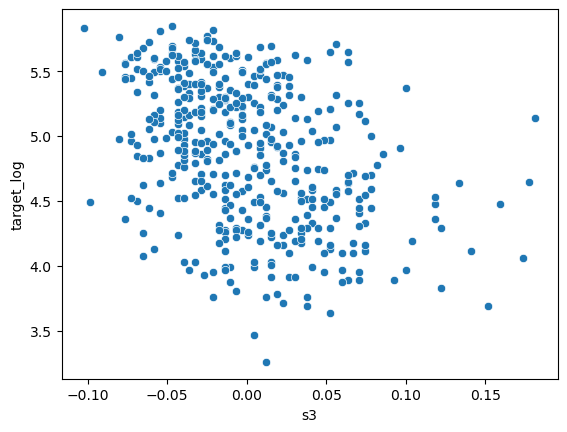

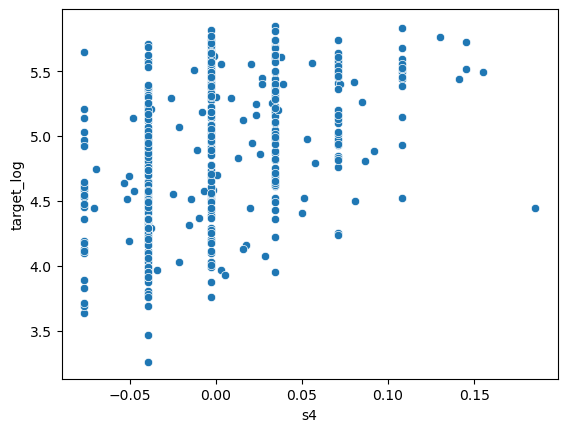

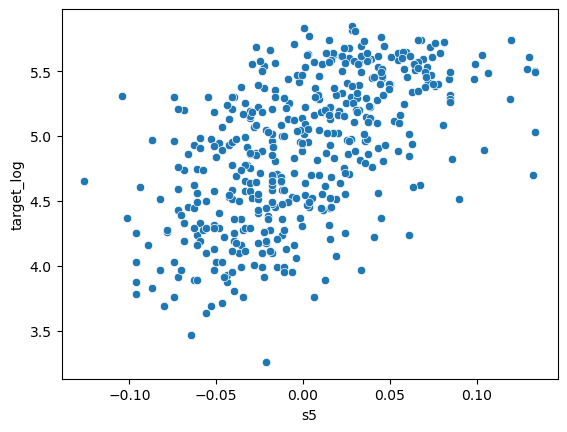

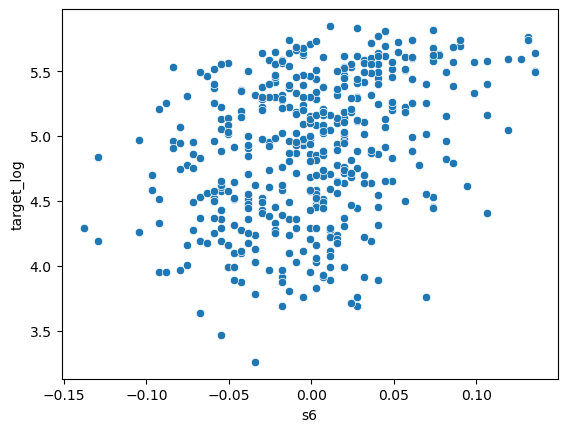

In [119]:
#print(cars_price_df.columns)
for num_var in ['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6' ]:
    sns.scatterplot(data=diabetes_df,y='target_log',x=num_var)
    plt.show()

$Observations$


In [120]:
 diabetes_df[['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6' ,'target_log']].corr()

,age,bmi,bp,s1,s2,s3,s4,s5,s6,target_log
age,1.000000,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.192981
bmi,0.185085,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.545857
bp,0.335428,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.414540
s1,0.260061,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.229215
s2,0.219243,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.200050
s3,-0.075181,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.400671
s4,0.203841,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.433384
s5,0.270774,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.566958
s6,0.301731,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.353424
target_log,0.192981,0.545857,0.414540,0.229215,0.200050,-0.400671,0.433384,0.566958,0.353424,1.000000


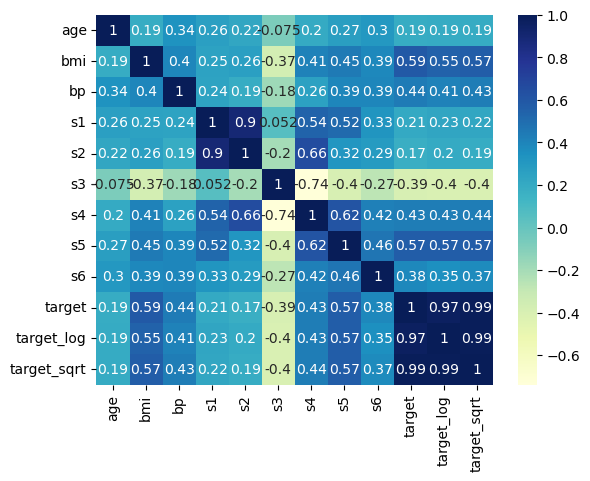

In [121]:
sns.heatmap(diabetes_df.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

# 10. Data Transformation

# 11. Standization - Normalization

# 12. Convert Cat - to - Numerical Columns

In [122]:
cat_onehot_df = pd.get_dummies(diabetes_df['sex'], prefix='Category',drop_first=False)

# Concatenate the dummy variables with the original DataFrame
diabetes_df = pd.concat([diabetes_df, cat_onehot_df], axis=1)
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,target_log,target_sqrt,Category_Female,Category_Male
0,0.038076,Male,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0,5.023881,12.288206,False,True
1,-0.001882,Female,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0,4.330733,8.660254,True,False
2,0.085299,Male,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0,4.955827,11.874342,False,True
3,-0.089063,Female,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0,5.332719,14.352700,True,False
4,0.005383,Female,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0,4.912655,11.618950,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,Male,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0,5.187386,13.341664,False,True
438,-0.005515,Male,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0,4.653960,10.198039,False,True
439,0.041708,Male,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0,4.890349,11.489125,False,True
440,-0.045472,Female,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0,5.398163,14.832397,True,False


## VIF

In [123]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
# VIF dataframe 
# the independent variables set 
X = diabetes_df[['age', 'bmi', 'bp', 's1','s2','s3','s4', 's5', 's6']] 
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

  feature        VIF
0     age   1.205380
1     bmi   1.478660
2      bp   1.407578
3      s1  59.062508
4      s2  39.123245
5      s3  15.369272
6      s4   8.833675
7      s5  10.075391
8      s6   1.476845


In [124]:
diabetes_df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target',
       'target_log', 'target_sqrt', 'Category_Female', 'Category_Male'],
      dtype='object')

In [125]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              442 non-null    float64
 1   sex              442 non-null    object 
 2   bmi              442 non-null    float64
 3   bp               442 non-null    float64
 4   s1               442 non-null    float64
 5   s2               442 non-null    float64
 6   s3               442 non-null    float64
 7   s4               442 non-null    float64
 8   s5               442 non-null    float64
 9   s6               442 non-null    float64
 10  target           442 non-null    float64
 11  target_log       442 non-null    float64
 12  target_sqrt      442 non-null    float64
 13  Category_Female  442 non-null    bool   
 14  Category_Male    442 non-null    bool   
dtypes: bool(2), float64(12), object(1)
memory usage: 45.9+ KB


# 13. Inferential statistics test

In [126]:
for i in ['Category_Female','Category_Male']:
    diabetes_df[i] = diabetes_df[i].astype(int)

In [127]:
import statsmodels.api as sm
X = sm.add_constant(diabetes_df[ ['age','Category_Female','Category_Male', 'bmi', 'bp', 's4']])

# Fit a linear regression model
model = sm.OLS(diabetes_df['target_log'], X)
results = model.fit()

# Print the regression results summary
print(results.summary())

# Calculate the R2 score
print(f"R2 score: {results.rsquared}")


                            OLS Regression Results                            
Dep. Variable:             target_log   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     58.95
Date:                Fri, 05 Apr 2024   Prob (F-statistic):           8.11e-47
Time:                        13:28:18   Log-Likelihood:                -251.08
No. Observations:                 442   AIC:                             514.2
Df Residuals:                     436   BIC:                             538.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.2569      0.014    2

$Observations$
- Durbin-Watson (1.901) - Since this is within the range of 1.5 and 2.5, we would consider autocorrelation not to be problematic in this regression model.

# 14. ML - Linear Regression Model

In [128]:
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,target_log,target_sqrt,Category_Female,Category_Male
0,0.038076,Male,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0,5.023881,12.288206,0,1
1,-0.001882,Female,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0,4.330733,8.660254,1,0
2,0.085299,Male,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0,4.955827,11.874342,0,1
3,-0.089063,Female,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0,5.332719,14.352700,1,0
4,0.005383,Female,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0,4.912655,11.618950,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,Male,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0,5.187386,13.341664,0,1
438,-0.005515,Male,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0,4.653960,10.198039,0,1
439,0.041708,Male,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0,4.890349,11.489125,0,1
440,-0.045472,Female,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0,5.398163,14.832397,1,0


In [129]:
diabetes_df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target',
       'target_log', 'target_sqrt', 'Category_Female', 'Category_Male'],
      dtype='object')

In [130]:
X=diabetes_df.drop(['sex','target','target_log','target_sqrt','s1','s2','s3','s5'],axis='columns')
Y=diabetes_df['target_log']

In [131]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30)
print("train data length:",len(X_train))
print("test data length:",len(X_test))
X.columns

train data length: 309
test data length: 133


Index(['age', 'bmi', 'bp', 's4', 's6', 'Category_Female', 'Category_Male'], dtype='object')

## 14.1 Linear Regression

In [132]:
def adjusted_r_squared(y_true, y_pred, n_samples, n_features):
    """
    Calculate the adjusted R-squared score.

    Parameters:
    - y_true: array-like, true target values
    - y_pred: array-like, predicted target values
    - n_samples: int, number of samples (observations)
    - n_features: int, number of features (predictors)

    Returns:
    - adjusted R-squared score
    """
    from sklearn.metrics import r2_score

    r_squared = r2_score(y_true, y_pred)
    adjusted_r_squared = 1 - (1 - r_squared) * ((n_samples - 1) / (n_samples - n_features - 1))
    
    return adjusted_r_squared


In [133]:
model_results = {}
def regression_matrix(model ,X_train,X_test,y_test, model_name):
    print("Model Name ",model_name)
    y_pred = model.predict(X_test)
    train_r2_score=round(model.score(X_train,y_train),3)
    print("train R2 Score:",train_r2_score)
    test_r2_score=round(model.score(X_test,y_test),3)
    print("Test R2 Score:",test_r2_score)
    print("Test R2 score:",r2_score(y_test,y_pred))
    
    mse = round(mean_squared_error(y_test,y_pred),3)
    print("MSE:",mse)
    rmse=round(root_mean_squared_error(y_test,y_pred),3)
    print("RMSE:",rmse)
    adj_r2_score=round(adjusted_r_squared(y_test,y_pred,len(y_test),len(X_train.columns)),3)
    print("Adj-R Score",adj_r2_score)
    
    if abs(train_r2_score - test_r2_score) > .10:
        print("model :" , model_name ,"is overfitting")
    if train_r2_score < 0.50:
        print("model :" , model_name ,"is underfitting")
    
    model_results[model_name]=[train_r2_score,test_r2_score,adj_r2_score,mse,rmse]
    

In [134]:
lr = LinearRegression()
lr.fit(X_train,y_train)


print("columns:",X_train.columns)
print('Coefficients: ', lr.coef_)
print('Intercept:',lr.intercept_)

regression_matrix(lr ,X_train,X_test,y_test, "LinearReg")


columns: Index(['age', 'bmi', 'bp', 's4', 's6', 'Category_Female', 'Category_Male'], dtype='object')
Coefficients:  [1.39325907e-01 4.35117875e+00 2.42200352e+00 2.70171861e+00
 7.69386859e-01 5.18536546e+13 5.18536546e+13]
Intercept: -51853654630233.305
Model Name  LinearReg
train R2 Score: 0.406
Test R2 Score: 0.384
Test R2 score: 0.3835401791869467
MSE: 0.203
RMSE: 0.451
Adj-R Score 0.349
model : LinearReg is underfitting


### Lasso Regression - L1 

In [135]:
lasso_reg = Lasso(alpha=0.1)  # Regularization strength (alpha) is set to 0.1
lasso_reg.fit(X_train,y_train)


print("columns:",X_train.columns)
print('Coefficients: ', lasso_reg.coef_)
print('Intercept:',lasso_reg.intercept_)

regression_matrix(lasso_reg ,X_train,X_test,y_test, "Lasso")

columns: Index(['age', 'bmi', 'bp', 's4', 's6', 'Category_Female', 'Category_Male'], dtype='object')
Coefficients:  [ 0.  0.  0.  0.  0. -0.  0.]
Intercept: 4.906647776732768
Model Name  Lasso
train R2 Score: 0.0
Test R2 Score: -0.009
Test R2 score: -0.009089103678235677
MSE: 0.332
RMSE: 0.576
Adj-R Score -0.066
model : Lasso is underfitting


### Ridge Regression -L2

In [136]:
ridge_reg = Ridge(alpha=0.1)  # Regularization strength (alpha) is set to 0.1
ridge_reg.fit(X_train,y_train)


print("columns:",X_train.columns)
print('Coefficients: ', ridge_reg.coef_)
print('Intercept:',ridge_reg.intercept_)

regression_matrix(ridge_reg ,X_train,X_test,y_test, "Ridge")

columns: Index(['age', 'bmi', 'bp', 's4', 's6', 'Category_Female', 'Category_Male'], dtype='object')
Coefficients:  [ 0.21007747  3.89141471  2.12889153  2.38843572  0.94872605  0.08373008
 -0.08373008]
Intercept: 4.904506703042359
Model Name  Ridge
train R2 Score: 0.404
Test R2 Score: 0.385
Test R2 score: 0.3850489233085802
MSE: 0.202
RMSE: 0.45
Adj-R Score 0.351
model : Ridge is underfitting


### Elastic Net 

In [137]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  # l1_ratio controls the balance between L1 and L2 penalties
elastic_net.fit(X_train,y_train)


print("columns:",X_train.columns)
print('Coefficients: ', elastic_net.coef_)
print('Intercept:',elastic_net.intercept_)

regression_matrix(elastic_net ,X_train,X_test,y_test, "ElasticNet")

columns: Index(['age', 'bmi', 'bp', 's4', 's6', 'Category_Female', 'Category_Male'], dtype='object')
Coefficients:  [ 0.  0.  0.  0.  0. -0.  0.]
Intercept: 4.906647776732768
Model Name  ElasticNet
train R2 Score: 0.0
Test R2 Score: -0.009
Test R2 score: -0.009089103678235677
MSE: 0.332
RMSE: 0.576
Adj-R Score -0.066
model : ElasticNet is underfitting


## 14.2 Decision Tree Regression

In [138]:
# Create and fit the model
model = DecisionTreeRegressor()
model.fit(X_train,y_train)
print("Model - Decision Tree Regression")

regression_matrix(model ,X_train,X_test,y_test, "DT")

Model - Decision Tree Regression
Model Name  DT
train R2 Score: 1.0
Test R2 Score: -0.395
Test R2 score: -0.3954094806190489
MSE: 0.459
RMSE: 0.678
Adj-R Score -0.474
model : DT is overfitting


## 14.3 Random Forest Regression

In [139]:
# Create and fit the model
model = RandomForestRegressor()
model.fit(X_train, y_train)
print("Model - Random Forest Regression")

regression_matrix(model ,X_train,X_test,y_test, "RandomForest")

Model - Random Forest Regression
Model Name  RandomForest
train R2 Score: 0.916
Test R2 Score: 0.304
Test R2 score: 0.30436736265603903
MSE: 0.229
RMSE: 0.479
Adj-R Score 0.265
model : RandomForest is overfitting


## 14.4 Support Vector Regression (SVR)

In [140]:
# Create and fit the model
model = SVR(kernel='linear')
model.fit(X_train, y_train)
print("Model - Support Vector Regression ")

regression_matrix(model ,X_train,X_test,y_test, "SVR")

Model - Support Vector Regression 
Model Name  SVR
train R2 Score: 0.369
Test R2 Score: 0.34
Test R2 score: 0.3397520250534686
MSE: 0.217
RMSE: 0.466
Adj-R Score 0.303
model : SVR is underfitting


## 14.5 AdaBoost Regression

In [141]:
# Create and fit the model
ada_boost = AdaBoostRegressor()
ada_boost.fit(X_train, y_train)
print("Model - AdaBoost Regression ")

regression_matrix(ada_boost ,X_train,X_test,y_test, "AdaBoost")

Model - AdaBoost Regression 
Model Name  AdaBoost
train R2 Score: 0.518
Test R2 Score: 0.336
Test R2 score: 0.3358851345079139
MSE: 0.219
RMSE: 0.468
Adj-R Score 0.299
model : AdaBoost is overfitting


## 14.6 Gradient Boosting Regression

In [142]:
# Create and fit the model
gradient_boost = GradientBoostingRegressor()
gradient_boost.fit(X_train, y_train)
print("Model - Gradient Boosting Regression")

regression_matrix(gradient_boost ,X_train,X_test,y_test, "GradientBoost")

Model - Gradient Boosting Regression
Model Name  GradientBoost
train R2 Score: 0.799
Test R2 Score: 0.333
Test R2 score: 0.33343144125657
MSE: 0.219
RMSE: 0.468
Adj-R Score 0.296
model : GradientBoost is overfitting


## 14.7 XGBoost Regression

In [143]:
# Create and fit the model
xg_boost = xgb.XGBRegressor()
xg_boost.fit(X_train, y_train)
print("Model-XGBoost Regression")

regression_matrix(xg_boost ,X_train,X_test,y_test, "XGB")

Model-XGBoost Regression
Model Name  XGB
train R2 Score: 1.0
Test R2 Score: 0.169
Test R2 score: 0.16930403063284327
MSE: 0.274
RMSE: 0.523
Adj-R Score 0.123
model : XGB is overfitting


## 18. Summary


In [144]:
print("\n\n")
result=pd.DataFrame(model_results,index=["Train R2","Test R2" ,"Adj R2","MSE","RMSE"])
print(result)
print("\n\n")

print(tabulate(result, headers='keys', tablefmt='pretty'))




          LinearReg  Lasso  Ridge  ElasticNet     DT  RandomForest    SVR  \
Train R2      0.406  0.000  0.404       0.000  1.000         0.916  0.369   
Test R2       0.384 -0.009  0.385      -0.009 -0.395         0.304  0.340   
Adj R2        0.349 -0.066  0.351      -0.066 -0.474         0.265  0.303   
MSE           0.203  0.332  0.202       0.332  0.459         0.229  0.217   
RMSE          0.451  0.576  0.450       0.576  0.678         0.479  0.466   

          AdaBoost  GradientBoost    XGB  
Train R2     0.518          0.799  1.000  
Test R2      0.336          0.333  0.169  
Adj R2       0.299          0.296  0.123  
MSE          0.219          0.219  0.274  
RMSE         0.468          0.468  0.523  



+----------+-----------+--------+-------+------------+--------+--------------+-------+----------+---------------+-------+
|          | LinearReg | Lasso  | Ridge | ElasticNet |   DT   | RandomForest |  SVR  | AdaBoost | GradientBoost |  XGB  |
+----------+-----------+-----